# O problema do XOR e o inverno da IA

Ao tentar utilizar um classificador linear para o XOR, viu-se que não era possível classificar de forma satisfatória suas saídas:

    A | B | Saída
    0 | 0 | 0
    1 | 0 | 1
    0 | 1 | 1
    1 | 1 | 0

Em um plano cartesiano, teríamos as saídas da seguinte forma:

   
    0       1

    1       0

Com uma linha reta, não podemos separar as saídas 0 das saídas 1, nem especializando vários perceptrons para nos dar a classificação. Com esse problema, iniciou-se o inverno da IA, onde nenhum avanço significativo foi feito em duas décadas.

# Geoffrey Hinton

O psicólogo cognitivo e cientista da computação Geoffrey Hinton propôs uma solução para os problemas de classificação não lineares (problemas como do XOR), onde a solução não pode ser dada por Perceptrons lineares.

Em uma rede multi camadas, temos as camadas escondidas (hidden layers), na qual não são camadas de entrada e nem camadas de saída. **As hidden layers precisam ter funções de ativação não lineares**, enquanto a camada de saída pode ter a função de ativação que melhor se encaixa com o problema.

A rede neural proposta de Hinton foi a seguinte:

- Uma camada escondida contendo 6 neurônios e ativação ReLU;
- Uma camada de saída contendo 1 neurônio e ativação Sigmoide.

"Uma rede neural feed-forward com apenas uma hidden layer é **suficiente para representar qualquer função**, mas a camada pode ser inviavelmente grande e pode falhar em aprender e generalizar corretamente".

# Definindo a arquitetura

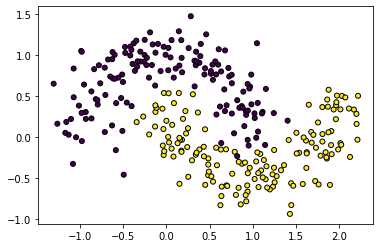

In [ ]:
# Criação de um dataser não linearmente separável
# com a função make_moons:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

coord, classes = make_moons(n_samples=300, noise=0.2)

plt.scatter(coord[:, 0], coord[:, 1], marker='o', c=classes, s=25, edgecolor='k')

In [ ]:
print("Formato dos dados de entrada:", coord.shape)

Formato dos dados de entrada: (300, 2)


Temos 300 pontos com 2 coordenadas (dimensões) cada.

## nn.Sequential:

Para definir a arquitetura, vamos utilizar o módulo nn.Sequential, é um container onde se pode colocar múltiplos módulos. Ao realizar um forward em um objeto Sequential, ele aplicará sequencialmente os módulos nele contidas para gerar uma saída.

In [ ]:
import torch
from torch import nn

input_size = 2 # dimensão dos dados de entrada
hidden_size = 8 # quantidade de neurônios na hidden layer
output_size = 1 # dimensão dos dados de saída

net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size),    # camada hidden
                    nn.ReLU(),                                                      # ativação nao linear
                    nn.Linear(in_features=hidden_size, out_features=output_size))   # camada de saída

print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


In [ ]:
# Forward dos dados:

tensor = torch.from_numpy(coord).float()
previsoes = net(tensor)

print("Formato dos dados de entrada:", coord.shape)
print("Formato dos dados de saída:", previsoes.shape)
print(previsoes)

Formato dos dados de entrada: (300, 2)
Formato dos dados de saída: torch.Size([300, 1])
tensor([[0.3890],
        [0.2750],
        [0.3404],
        [0.2097],
        [0.2516],
        [0.3116],
        [0.2566],
        [0.2879],
        [0.2642],
        [0.2293],
        [0.3322],
        [0.3633],
        [0.2468],
        [0.4502],
        [0.3065],
        [0.1360],
        [0.2783],
        [0.2556],
        [0.3441],
        [0.3625],
        [0.3183],
        [0.3095],
        [0.3045],
        [0.2819],
        [0.1764],
        [0.2502],
        [0.3066],
        [0.3190],
        [0.2583],
        [0.2548],
        [0.3277],
        [0.2713],
        [0.2312],
        [0.4031],
        [0.1837],
        [0.3276],
        [0.3531],
        [0.3100],
        [0.3035],
        [0.2323],
        [0.1616],
        [0.3114],
        [0.2634],
        [0.3316],
        [0.3143],
        [0.1760],
        [0.3687],
        [0.3018],
        [0.3598],
        [0.3557],
        [0.2

Temos 300 predições com 1 dimensão cada.


## nn.Module

Com o nn.Module, devemos definir uma classe que fará o processamento da nn:

In [ ]:
class MinhaRede(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MinhaRede, self).__init__()
        # definição da arquitetura
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, X):
        # processar uma saída a partir do x
        hidden = self.relu(self.hidden(X))
        output = self.output(hidden)

        return output

In [ ]:
input_size = 2 # dimensão dos dados de entrada
hidden_size = 8 # quantidade de neurônios na hidden layer
output_size = 1 # dimensão dos dados de saída

net = MinhaRede(input_size, hidden_size, output_size)
previsoes = net.forward(tensor)

print("Formato dos dados de entrada:", coord.shape)
print("Formato dos dados de saída:", previsoes.shape)
print(previsoes)

Formato dos dados de entrada: (300, 2)
Formato dos dados de saída: torch.Size([300, 1])
tensor([[0.4076],
        [0.2298],
        [0.3721],
        [0.3015],
        [0.3043],
        [0.2057],
        [0.3015],
        [0.3254],
        [0.2122],
        [0.3015],
        [0.1421],
        [0.4132],
        [0.3015],
        [0.4763],
        [0.3423],
        [0.3015],
        [0.3015],
        [0.3015],
        [0.1547],
        [0.4279],
        [0.1676],
        [0.1886],
        [0.3164],
        [0.2616],
        [0.3015],
        [0.1643],
        [0.1532],
        [0.1590],
        [0.1599],
        [0.1414],
        [0.1569],
        [0.1374],
        [0.2455],
        [0.2557],
        [0.3015],
        [0.3766],
        [0.1653],
        [0.3421],
        [0.1245],
        [0.2491],
        [0.3015],
        [0.3427],
        [0.1602],
        [0.3586],
        [0.3478],
        [0.3015],
        [0.1773],
        [0.1483],
        [0.3934],
        [0.1935],
        [0.1

# Rodando na GPU

In [ ]:
if torch.cuda.is_available:
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cuda


In [ ]:
net = MinhaRede(input_size, hidden_size, output_size)
net = net.to(device) # envia a rede para a GPU
print(net)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [ ]:
tensor = torch.from_numpy(coord).float()
tensor = tensor.to(device) # envia os dados para a GPU

previsoes = net(tensor)

print("Formato dos dados de entrada:", coord.shape)
print("Formato dos dados de saída:", previsoes.shape)
print(previsoes)

Formato dos dados de entrada: (300, 2)
Formato dos dados de saída: torch.Size([300, 1])
tensor([[0.5345],
        [0.3863],
        [0.4859],
        [0.3769],
        [0.6521],
        [0.3280],
        [0.4491],
        [0.5798],
        [0.4034],
        [0.5026],
        [0.3673],
        [0.5040],
        [0.4277],
        [0.5909],
        [0.4177],
        [0.6807],
        [0.3699],
        [0.4269],
        [0.3661],
        [0.5001],
        [0.4170],
        [0.3224],
        [0.4582],
        [0.3899],
        [0.6665],
        [0.3901],
        [0.4214],
        [0.4043],
        [0.3759],
        [0.3878],
        [0.3905],
        [0.4201],
        [0.3541],
        [0.3847],
        [0.3949],
        [0.4666],
        [0.3443],
        [0.4253],
        [0.3916],
        [0.3516],
        [0.6748],
        [0.6043],
        [0.3714],
        [0.6446],
        [0.6639],
        [0.6367],
        [0.3376],
        [0.4198],
        [0.5039],
        [0.3239],
        [0.3